<양자역학:해밀토니안을 구해보자>

In [3]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt 
import numpy as np

In [4]:
a=5
ep=0.05
end=(a/ep)+1

hbar=1
m=1

#x=[0:a/(N-1):a]
x=torch.linspace(0, a, int(end))#x=[0:ep:a]
N=len(x)
print(x.size())

identity_matrix = torch.eye(N)  
off_diag = torch.ones(N-1) 

#운동량 연산자(x-bais)
K = (1/ep**2) * ((-hbar**2) / (2 * m)) * (-2 * identity_matrix + torch.diag(off_diag, 1) + torch.diag(off_diag, -1))
#K=K.float()
print(K.size())

#Infinite well Potential(x-bais)
V_infi=torch.zeros(N,N)
i=1
V_infi[0:i,0:i]=1e3
V_infi[N-i:,N-i:]=1e3 
print(V_infi.size())

#Hamiltonian
H = K+V_infi

torch.Size([101])
torch.Size([101, 101])
torch.Size([101, 101])


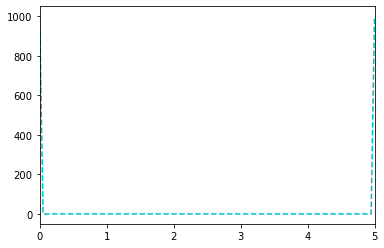

In [5]:
V_infi_flat=torch.diag(V_infi)

plt.figure()
plt.plot(x, V_infi_flat, 'c--')
plt.xlim(0,a)
#plt.ylim(-1,1)
plt.show()

In [6]:
#true value
def eigen(Ht):
    eigenvals , eigenvecs = torch.linalg.eigh(Ht)
    return eigenvals , eigenvecs

eigenvals_tr , eigenvecs_tr=eigen(H)



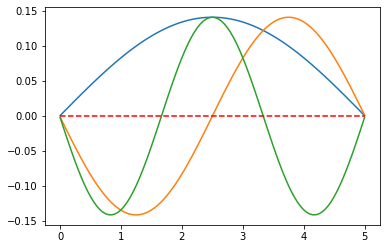

In [7]:
for i in range(0,3):
    plt.plot(x, eigenvecs_tr[:,i])
plt.plot(x, 1e-15*V_infi_flat, "r--")

In [9]:
eigenvals_tr

tensor([1.9611e-01, 7.8414e-01, 1.7635e+00, 3.1333e+00, 4.8922e+00, 7.0384e+00,
        9.5700e+00, 1.2484e+01, 1.5779e+01, 1.9450e+01, 2.3494e+01, 2.7908e+01,
        3.2686e+01, 3.7825e+01, 4.3319e+01, 4.9164e+01, 5.5352e+01, 6.1879e+01,
        6.8737e+01, 7.5921e+01, 8.3423e+01, 9.1236e+01, 9.9352e+01, 1.0776e+02,
        1.1646e+02, 1.2544e+02, 1.3469e+02, 1.4420e+02, 1.5396e+02, 1.6396e+02,
        1.7419e+02, 1.8465e+02, 1.9532e+02, 2.0619e+02, 2.1725e+02, 2.2850e+02,
        2.3991e+02, 2.5148e+02, 2.6319e+02, 2.7505e+02, 2.8702e+02, 2.9911e+02,
        3.1130e+02, 3.2358e+02, 3.3593e+02, 3.4835e+02, 3.6082e+02, 3.7333e+02,
        3.8587e+02, 3.9842e+02, 4.1098e+02, 4.2352e+02, 4.3605e+02, 4.4854e+02,
        4.6098e+02, 4.7337e+02, 4.8568e+02, 4.9792e+02, 5.1005e+02, 5.2208e+02,
        5.3399e+02, 5.4577e+02, 5.5741e+02, 5.6890e+02, 5.8021e+02, 5.9136e+02,
        6.0231e+02, 6.1306e+02, 6.2361e+02, 6.3394e+02, 6.4403e+02, 6.5389e+02,
        6.6349e+02, 6.7284e+02, 6.8192e+

In [10]:
eigenvals_tr/eigenvals_tr[0]

tensor([1.0000e+00, 3.9984e+00, 8.9924e+00, 1.5977e+01, 2.4946e+01, 3.5889e+01,
        4.8798e+01, 6.3658e+01, 8.0456e+01, 9.9176e+01, 1.1980e+02, 1.4230e+02,
        1.6667e+02, 1.9287e+02, 2.2089e+02, 2.5069e+02, 2.8224e+02, 3.1552e+02,
        3.5050e+02, 3.8713e+02, 4.2538e+02, 4.6522e+02, 5.0660e+02, 5.4949e+02,
        5.9385e+02, 6.3963e+02, 6.8678e+02, 7.3527e+02, 7.8503e+02, 8.3604e+02,
        8.8822e+02, 9.4154e+02, 9.9595e+02, 1.0514e+03, 1.1078e+03, 1.1651e+03,
        1.2233e+03, 1.2823e+03, 1.3420e+03, 1.4025e+03, 1.4636e+03, 1.5252e+03,
        1.5873e+03, 1.6500e+03, 1.7129e+03, 1.7763e+03, 1.8399e+03, 1.9036e+03,
        1.9676e+03, 2.0316e+03, 2.0956e+03, 2.1596e+03, 2.2234e+03, 2.2871e+03,
        2.3506e+03, 2.4137e+03, 2.4765e+03, 2.5389e+03, 2.6008e+03, 2.6621e+03,
        2.7229e+03, 2.7829e+03, 2.8423e+03, 2.9008e+03, 2.9585e+03, 3.0154e+03,
        3.0712e+03, 3.1261e+03, 3.1798e+03, 3.2325e+03, 3.2840e+03, 3.3342e+03,
        3.3832e+03, 3.4308e+03, 3.4771e+

In [11]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.L1=nn.Linear(2,10)
        self.L2=nn.Linear(10,1)
        self.act= nn.ReLU() 

    def forward(self, x, eigenvalss):
        data = torch.cat((x.view(-1, 1), eigenvalss.view(-1, 1)), dim=1)
        layer = self.act(self.L1(data))
        output = self.L2(layer)
        return output.view(-1)


model=Model()
V_model=model(x,eigenvals_tr) #output
Vdiag_model=torch.diag(V_model) #diagonalized output


In [36]:
'''
a=torch.tensor([1,2,3])
b=torch.tensor([[2],[2],[3]])
b.size()
a1=torch.diag(a)
b1=torch.diag(b)
'''

In [12]:
#epoch 돌리기

optimizer = torch.optim.Adam( model.parameters(),lr=0.1)


for j in range(500):

    V_model=model(x,eigenvals_tr)
    Vdiag_model=torch.diag(V_model)
    H_model=K+Vdiag_model
    
    eigenvals_model, eigenvecs_model = eigen(H_model)

    loss = torch.mean(torch.abs(eigenvals_tr - eigenvals_model))
    print(f"Iteration {j}, Loss: {loss.item()}")

    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Iteration 0, Loss: 33.7044792175293
Iteration 1, Loss: 26.54258155822754
Iteration 2, Loss: 21.546655654907227
Iteration 3, Loss: 16.58884620666504
Iteration 4, Loss: 16.56749725341797
Iteration 5, Loss: 17.44927215576172
Iteration 6, Loss: 16.75718116760254
Iteration 7, Loss: 16.26314926147461
Iteration 8, Loss: 16.438745498657227
Iteration 9, Loss: 16.88468360900879
Iteration 10, Loss: 17.201204299926758
Iteration 11, Loss: 17.16822624206543
Iteration 12, Loss: 16.832590103149414
Iteration 13, Loss: 16.419540405273438
Iteration 14, Loss: 16.255285263061523
Iteration 15, Loss: 16.530445098876953
Iteration 16, Loss: 16.86774253845215
Iteration 17, Loss: 16.681198120117188
Iteration 18, Loss: 16.346420288085938
Iteration 19, Loss: 16.26001739501953
Iteration 20, Loss: 16.398773193359375
Iteration 21, Loss: 16.554094314575195
Iteration 22, Loss: 16.580469131469727
Iteration 23, Loss: 16.46482276916504
Iteration 24, Loss: 16.31386947631836
Iteration 25, Loss: 16.255075454711914
Iteration 

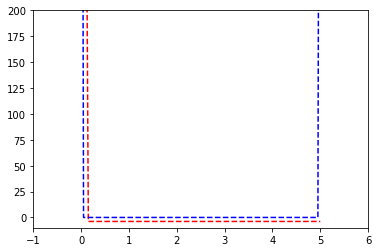

In [21]:
V_flat_model=torch.diag(Vdiag_model.detach())

plt.figure()
plt.plot(x, V_flat_model, 'c--', color='r')
plt.plot(x, V_infi_flat, 'c--', color='b')
plt.xlim(-1,6)
plt.ylim(-10,200)
plt.show()
